<center><h1>Fundamentos Data Science parte 2</h1><center>
    Autor: Walther Becks

## Desafío 2: Rendimiento escolar

Lo contactan de una escuela Portuguesa para generar **un modelo que identifique aquellos
alumnos** que presentan un bajo desempeño académico, **medido en el promedio final del año
escolar**. Para ello le envían un archivo con registros sociodemográficos y conductuales de
los alumnos de dos escuelas **para perfilar a los estudiantes**.
De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas
asociadas a aspectos ambientales del alumno (de famrel a health) y ver si éstas se
pueden **abstraer en categorías latentes.**

**Datos Asociados: students.csv**

## Hito 1: Análisis preliminar

1. Se nos pide desarrollar uno modelo predictivo a partir de las notas finales del alumno (G3) para identificar aquellos alumnos con bajo desempeño académico. Junto a eso, nos solicitan la modelación de 3 modelos descriptivos (G1, G2, G3), es por esto que como primer paso debemos validar los 3 primeros desde la econometría y uno desde el ML.

2. Estamos frente a un problema de **Regresión** ya que los **vectores objetivo** son de naturaleza numérica.

**Librerías a utilizar:** 

1. pandas == 1.2.0
2. numpy == 1.20.3
3. scipy == 1.7.3  
4. matplotlib == 3.0.3
5. seaborn == 0.11.2 
6. statsmodels == 0.13.2
7. conda == 4.8.3
8. python == 3.7.3
9. missingno == 0.5.1

-------------

## Hito 2

### Importe de librerias

In [29]:
import pandas as pd # Librería de manipulación de datos
import numpy as np # Librería de manipulación de datos
import matplotlib.pyplot as plt # Librería de visualización de datos y gráficos
import seaborn as sns # Librería de visualización de datos y gráficos
sns.set_style('darkgrid') # Parte de la librería de seaborn, que permite un estilo distinto al default en visualización
import missingno # Librería de visualización de falta de datos para análisis exploratorio
import warnings # Librería para ignorar las advertencias que arroja Python por cambio de versiones y ver un código más claro
warnings.filterwarnings('ignore') # Importe de la opción de ignorar las advertencias.

# Clasificación desde la Econometría
import statsmodels.api as sm # Librería que permite funciones y clases para la estimación de múltiples modelos estadísticos, como también pruebas estadisticas y exploración estadística.
import statsmodels.formula.api as smf # Librería que permite la creación del modelo en base a una formula y Data Frame.
# Clasificación desde el Machine Learning
from sklearn import linear_model # Importe de librería de herramientas de predicción de análisis de datos para modelos lineales y regresión logística
from sklearn.model_selection import train_test_split # Librería para dividir la muestra entre entrenamiento y prueba
from sklearn.metrics import mean_squared_error, r2_score # Librería que importa herramientas de análisis de error cuadratico y error cuadratico medio
from sklearn.preprocessing import StandardScaler # Librería de estandarización de variables de muestras de prueba y entrenamiento usado para Machine Learning
from sklearn.metrics import classification_report, roc_curve, confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score # Librerías de Machine Learning utilizadas para medir la efectividad de los modelos.

import functions # Funciones creadas ad-hoc para la realización de este examen. 
plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6) # Ampliar las figuras gráficas
plt.rcParams["figure.dpi"] = 200 # Mejora de calidad de los gráficos
pd.set_option('display.max_rows', None) # Opción que permite ver todas las filas al cargar un Data Frame
pd.set_option('display.max_columns', None) # Opción que permite ver todas las columnas de un Data Frame

### Importe de datos

In [3]:
df = pd.read_csv('students.csv', sep = '|', encoding = 'latin1')
df = df.replace(['nulidade', 'sem validade', 'zero'], np.nan).drop('Unnamed: 0', axis = 1)
print(f"Contamos con {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()

Contamos con 395 filas y 33 columnas


school sex   age address famsize Pstatus Medu Fedu     Mjob      Fjob  \
0     GP   F   NaN       U     GT3       A    4    4  at_home   teacher   
1     GP   F  "17"       U     GT3       T    1    1  at_home     other   
2     GP   F  "15"       U     LE3       T    1    1  at_home     other   
3     GP   F  "15"       U     GT3       T    4    2   health  services   
4     GP   F   NaN       U     GT3       T    3    3    other     other   

   reason guardian traveltime studytime failures schoolsup famsup paid  \
0  course   mother          2         2        0       yes     no   no   
1  course   father          1         2        0        no    yes   no   
2   other   mother          1         2        3       yes     no  yes   
3    home   mother          1         3        0        no    yes  yes   
4    home   father          1         2        0        no    yes  yes   

  activities nursery higher internet romantic famrel freetime goout Dalc Walc  \
0         no     yes    yes       no       no      4        3   "4"    1    1   
1         no      no    yes      yes       no      5        3   "3"    1    1   
2         no     yes    yes      yes       no      4        3   "2"    2    3   
3        yes     yes    yes      yes      yes      3        2   "2"    1    1   
4         no     yes    yes       no       no      4        3   "2"    1    2   

  health absences   G1  G2  G3  
0    "3"        6    5   6   6  
1    "3"        4    5   5   6  
2    "3"       10  NaN   8  10  
3    "5"        2   15  14  15  
4    "5"        4    6  10  10

### Limpieza de base de datos

#### Valores nulos

In [4]:
df = df.replace(to_replace='?',value= np.nan)
df.apply(lambda x: f"{round((x[x.isna()].shape[0]/x.shape[0])*100, 2)}%").sort_values(ascending = False).to_frame().rename(columns = {0:'% nulos'})

% nulos
schoolsup    2.03%
Pstatus      1.52%
higher       1.52%
nursery      1.52%
Mjob         1.52%
school       1.27%
studytime    1.27%
Walc         1.27%
goout        1.27%
famrel       1.27%
activities   1.27%
failures     1.27%
famsup       1.27%
Fedu         1.27%
famsize      1.01%
guardian     1.01%
reason       1.01%
G1           1.01%
absences     1.01%
health       1.01%
age          1.01%
Dalc         0.76%
traveltime   0.76%
internet     0.76%
Medu         0.76%
sex          0.76%
G3           0.76%
romantic     0.51%
freetime     0.51%
address      0.51%
paid         0.25%
Fjob          0.0%
G2            0.0%

In [5]:
missingno.matrix(df)

In [7]:
df_droped_na = df.dropna()
print(f"Se limpió la base de valores nulos, con lo que se consiguió conservar un {round(df_droped_na.shape[0]/df.shape[0]*100)}% de los datos, se perdieron {df.shape[0]-df_droped_na.shape[0]} filas y se conservaron {df_droped_na.shape[0]}.\nEn el gráfico de missingno podemos observar que la ausencia de datos es equitativa para las 33 columnas del set de datos")

Se limpió la base de valores nulos, con lo que se consiguió conservar un 72% de los datos, se perdieron 111 filas y se conservaron 284.
En el gráfico de missingno podemos observar que la ausencia de datos es equitativa para las 33 columnas del set de datos


### Tipos de datos

In [8]:
df_droped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 1 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      284 non-null    object
 1   sex         284 non-null    object
 2   age         284 non-null    object
 3   address     284 non-null    object
 4   famsize     284 non-null    object
 5   Pstatus     284 non-null    object
 6   Medu        284 non-null    object
 7   Fedu        284 non-null    object
 8   Mjob        284 non-null    object
 9   Fjob        284 non-null    object
 10  reason      284 non-null    object
 11  guardian    284 non-null    object
 12  traveltime  284 non-null    object
 13  studytime   284 non-null    object
 14  failures    284 non-null    object
 15  schoolsup   284 non-null    object
 16  famsup      284 non-null    object
 17  paid        284 non-null    object
 18  activities  284 non-null    object
 19  nursery     284 non-null    object
 20  higher    

In [40]:
for i in df_droped_na.axes[1]:
    if df_droped_na[i].dtype == 'object':
        print(i)
        print(df_droped_na[i].unique())
        

school
['GP' 'MS']
sex
['F' 'M']
age
['"17"' '"15"' '"16"' '"18"' '"19"' '"20"' '"21"']
address
['U' 'R']
famsize
['GT3' 'LE3']
Pstatus
['T' 'A']
Medu
['1' '4' '2' '3' '0']
Fedu
['1' '2' '3' '4' '0']
Mjob
['at_home' 'health' 'services' 'other' 'teacher']
Fjob
['other' 'services' 'teacher' 'health' 'at_home']
reason
['course' 'home' 'reputation' 'other']
guardian
['father' 'mother' 'other']
traveltime
['1' '2' '3' '4']
studytime
['2' '3' '1' '4']
failures
['0' '3' '1' '2']
schoolsup
['no' 'yes']
famsup
['yes' 'no']
paid
['no' 'yes']
activities
['no' 'yes']
nursery
['no' 'yes']
higher
['yes' 'no']
internet
['yes' 'no']
romantic
['no' 'yes']
famrel
['5' '3' '4' '2' '1']
freetime
['3' '2' '4' '1' '5']
goout
['"3"' '"2"' '"4"' '"1"' '"5"']
Dalc
['1' '2' '3' '4' '5']
Walc
['1' '2' '3' '4' '5']
health
['"3"' '"5"' '"1"' '"4"' '"2"']
absences
['4' '2' '10' '0' '6' '16' '7' '8' '25' '12' '54' '18' '14' '26' '20' '24'
 '28' '5' '13' '15' '22' '21' '1' '75' '30' '19' '11' '38' '3' '40' '9'
 '17']

In [6]:
df_droped_na.head()

school sex   age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
1     GP   F  "17"       U     GT3       T    1    1   at_home     other   
3     GP   F  "15"       U     GT3       T    4    2    health  services   
5     GP   M  "16"       U     LE3       T    4    3  services     other   
6     GP   M  "16"       U     LE3       T    2    2     other     other   
7     GP   F  "17"       U     GT3       A    4    4     other   teacher   

       reason guardian traveltime studytime failures schoolsup famsup paid  \
1      course   father          1         2        0        no    yes   no   
3        home   mother          1         3        0        no    yes  yes   
5  reputation   mother          1         2        0        no    yes  yes   
6        home   mother          1         2        0        no     no   no   
7        home   mother          2         2        0       yes    yes   no   

  activities nursery higher internet romantic famrel freetime goout Dalc Walc  \
1         no      no    yes      yes       no      5        3   "3"    1    1   
3        yes     yes    yes      yes      yes      3        2   "2"    1    1   
5        yes     yes    yes      yes       no      5        4   "2"    1    2   
6         no     yes    yes      yes       no      4        4   "4"    1    1   
7         no     yes    yes       no       no      4        1   "4"    1    1   

  health absences  G1  G2  G3  
1    "3"        4   5   5   6  
3    "5"        2  15  14  15  
5    "5"       10  15  15  15  
6    "3"        0  12  12  11  
7    "1"        6   6   5   6

**Podemos observar que luego de la limpieza de valores faltantes, al analizar el tipo de datos tenemos 31/32 columnas valores tipo objeto, por lo que procederemos a analizar los valores únicos y a proceder a limpiar aquellos datos númericos contaminados con signos del tipo texto y finalmente se convertirá ese tipo de dato a numérico junto con binarizar aquellas que que tienen naturaleza binaria, todo se trabajará en el importe de functions**

#### Recodificación de las variables

1. Utilizando el importe de functions, recodificaremos y binarizaremos las variables
2. Normalizaremos las varibles numéricas (excepto las binarias).

In [113]:
df_recodificacion = functions.recodificaciones_d2(df_droped_na)
df_recodificacion['failures_bin'] = np.where(df_recodificacion['failures'] > 0,1,0)
df_recodificacion['goout_bin>3'] = np.where(df_recodificacion['goout'] > 3,1,0)
df_recodificacion['Medu>2'] = np.where(df_recodificacion['Medu'] > 2,1,0)
df_bin = functions.normalizar(df_recodificacion,exclude = df_recodificacion.select_dtypes('uint8').columns)

print(df_bin.shape)
print(f"**De las {df_droped_na.shape[1]} columnas originales, se procedió a agregar {df_bin.shape[1]-df_droped_na.shape[1]} columnas binarias, dejando un total {df_bin.shape[1]} columnas**")
df_bin.head()

(284, 45)
**De las 33 columnas originales, se procedió a agregar 12 columnas binarias, dejando un total 45 columnas**


age      Medu      Fedu  traveltime  studytime  failures  absences  \
1  0.227570 -1.620078 -1.394201   -0.683631  -0.058448 -0.457606 -0.194699   
3 -1.329774  1.118625 -0.477643   -0.683631   1.127213 -0.457606 -0.439907   
5 -0.551102  1.118625  0.438915   -0.683631  -0.058448 -0.457606  0.540926   
6 -0.551102 -0.707177 -0.477643   -0.683631  -0.058448 -0.457606 -0.685115   
7  0.227570  1.118625  1.355473    0.754527  -0.058448 -0.457606  0.050509   

     famrel  freetime     goout     Dalc      Walc    health        G1  \
1  1.202119 -0.182751 -0.078500 -0.54848 -0.964107 -0.475138 -1.803813   
3 -1.066331 -1.162020 -1.007412 -0.54848 -0.964107  1.041033  1.236441   
5  1.202119  0.796518 -1.007412 -0.54848 -0.186248  1.041033  1.236441   
6  0.067894  0.796518  0.850413 -0.54848 -0.964107 -0.475138  0.324365   
7  0.067894 -2.141288  0.850413 -0.54848 -0.964107 -1.991308 -1.499787   

         G2        G3  failures_bin  goout_bin>3    Medu>2  school_MS  sex_M  \
1 -1.488656 -0.962431     -0.522091     -0.69656 -1.201323          0      0   
3  0.886503  1.008702     -0.522091     -0.69656  0.829485          0      0   
5  1.150410  1.008702     -0.522091     -0.69656  0.829485          0      1   
6  0.358690  0.132643     -0.522091      1.43057 -1.201323          0      1   
7 -1.488656 -0.962431     -0.522091      1.43057  0.829485          0      0   

   address_U  famsize_LE3  Pstatus_T  schoolsup_yes  famsup_yes  paid_yes  \
1          1            0          1              0           1         0   
3          1            0          1              0           1         1   
5          1            1          1              0           1         1   
6          1            1          1              0           0         0   
7          1            0          0              1           1         0   

   activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  \
1               0            0           1             1             0   
3               1            1           1             1             1   
5               1            1           1             1             0   
6               0            1           1             1             0   
7               0            1           1             0             0   

   Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  Fjob_health  \
1            0           0              0             0            0   
3            1           0              0             0            0   
5            0           0              1             0            0   
6            0           1              0             0            0   
7            0           1              0             0            0   

   Fjob_other  Fjob_services  Fjob_teacher  reason_home  reason_other  \
1           1              0             0            0             0   
3           0              1             0            1             0   
5           1              0             0            0             0   
6           1              0             0            1             0   
7           0              0             1            1             0   

   reason_reputation  guardian_mother  guardian_other  
1                  0                0               0  
3                  0                1               0  
5                  1                1               0  
6                  0                1               0  
7                  0                1               0

In [92]:
df_recodificacion.head()

age  Medu  Fedu  traveltime  studytime  failures  absences  famrel  \
1   17     1     1           1          2         0         4       5   
3   15     4     2           1          3         0         2       3   
5   16     4     3           1          2         0        10       5   
6   16     2     2           1          2         0         0       4   
7   17     4     4           2          2         0         6       4   

   freetime  goout  Dalc  Walc  health  G1  G2  G3  school_MS  sex_M  \
1         3      3     1     1       3   5   5   6          0      0   
3         2      2     1     1       5  15  14  15          0      0   
5         4      2     1     2       5  15  15  15          0      1   
6         4      4     1     1       3  12  12  11          0      1   
7         1      4     1     1       1   6   5   6          0      0   

   address_U  famsize_LE3  Pstatus_T  schoolsup_yes  famsup_yes  paid_yes  \
1          1            0          1              0           1         0   
3          1            0          1              0           1         1   
5          1            1          1              0           1         1   
6          1            1          1              0           0         0   
7          1            0          0              1           1         0   

   activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  \
1               0            0           1             1             0   
3               1            1           1             1             1   
5               1            1           1             1             0   
6               0            1           1             1             0   
7               0            1           1             0             0   

   Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  Fjob_health  \
1            0           0              0             0            0   
3            1           0              0             0            0   
5            0           0              1             0            0   
6            0           1              0             0            0   
7            0           1              0             0            0   

   Fjob_other  Fjob_services  Fjob_teacher  reason_home  reason_other  \
1           1              0             0            0             0   
3           0              1             0            1             0   
5           1              0             0            0             0   
6           1              0             0            1             0   
7           0              0             1            1             0   

   reason_reputation  guardian_mother  guardian_other  failures_bin  \
1                  0                0               0             0   
3                  0                1               0             0   
5                  1                1               0             0   
6                  0                1               0             0   
7                  0                1               0             0   

   goout_bin>3  
1            0  
3            0  
5            0  
6            1  
7            1

In [11]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 1 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                284 non-null    float64
 1   Medu               284 non-null    float64
 2   Fedu               284 non-null    float64
 3   traveltime         284 non-null    float64
 4   studytime          284 non-null    float64
 5   failures           284 non-null    float64
 6   absences           284 non-null    float64
 7   famrel             284 non-null    float64
 8   freetime           284 non-null    float64
 9   goout              284 non-null    float64
 10  Dalc               284 non-null    float64
 11  Walc               284 non-null    float64
 12  health             284 non-null    float64
 13  G1                 284 non-null    float64
 14  G2                 284 non-null    float64
 15  G3                 284 non-null    float64
 16  school_MS          284 non

## Análisis exploratorio

### Análisis exploratorio inicial de variables numéricas continuas

In [23]:
df_recodificacion.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean    16.707746    2.774648    2.521127    1.475352    2.049296    0.334507   
std      1.284238    1.095409    1.091038    0.695334    0.843411    0.730994   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    3.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     21.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

         absences      famrel   freetime       goout        Dalc        Walc  \
count  284.000000  284.000000  284.00000  284.000000  284.000000  284.000000   
mean     5.588028    3.940141    3.18662    3.084507    1.482394    2.239437   
std      8.156335    0.881659    1.02117    1.076527    0.879512    1.285580   
min      0.000000    1.000000    1.00000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    3.00000    2.000000    1.000000    1.000000   
50%      4.000000    4.000000    3.00000    3.000000    1.000000    2.000000   
75%      7.000000    5.000000    4.00000    4.000000    2.000000    3.000000   
max     75.000000    5.000000    5.00000    5.000000    5.000000    5.000000   

           health          G1          G2          G3   school_MS       sex_M  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean     3.626761   10.933099   10.640845   10.394366    0.130282    0.482394   
std      1.319113    3.289199    3.789220    4.565902    0.337207    0.500572   
min      1.000000    4.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    8.000000    9.000000    8.000000    0.000000    0.000000   
50%      4.000000   11.000000   10.500000   11.000000    0.000000    0.000000   
75%      5.000000   13.000000   13.000000   13.000000    0.000000    1.000000   
max      5.000000   19.000000   19.000000   20.000000    1.000000    1.000000   

        address_U  famsize_LE3  Pstatus_T  schoolsup_yes  famsup_yes  \
count  284.000000   284.000000  284.00000     284.000000  284.000000   
mean     0.753521     0.264085    0.90493       0.133803    0.612676   
std      0.431721     0.441623    0.29383       0.341041    0.487999   
min      0.000000     0.000000    0.00000       0.000000    0.000000   
25%      1.000000     0.000000    1.00000       0.000000    0.000000   
50%      1.000000     0.000000    1.00000       0.000000    1.000000   
75%      1.000000     1.000000    1.00000       0.000000    1.000000   
max      1.000000     1.000000    1.00000       1.000000    1.000000   

         paid_yes  activities_yes  nursery_yes  higher_yes  internet_yes  \
count  284.000000      284.000000   284.000000  284.000000    284.000000   
mean     0.443662        0.521127     0.785211    0.947183      0.813380   
std      0.497693        0.500435     0.411401    0.224063      0.390294   
min      0.000000        0.000000     0.000000    0.000000      0.000000   
25%      0.000000        0.000000     1.000000    1.000000      1.000000   
50%      0.000000        1.000000     1.000000    1.000000      1.000000   
75%      1.000000        1.000000     1.000000    1.000000      1.000000   
max      1.000000        1.000000     1.000000    1.000000      1.000000   

       romantic_yes  Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  \
count    284.000000   284.000000  284.000000     284.000000    284.000000   
mean       0.334507     0.091549    0.362676       0.239437      0.154930   
std        0.472651     0.288898    0.481621       0.427493      0.362476   
min        0.000000     0.000000    0.000000       0.000000      0.000000   
25%        0.000000     0.000000    0.000000       0.000000      0.000000   
50%        0.000000     0.000000    0

### Correlación

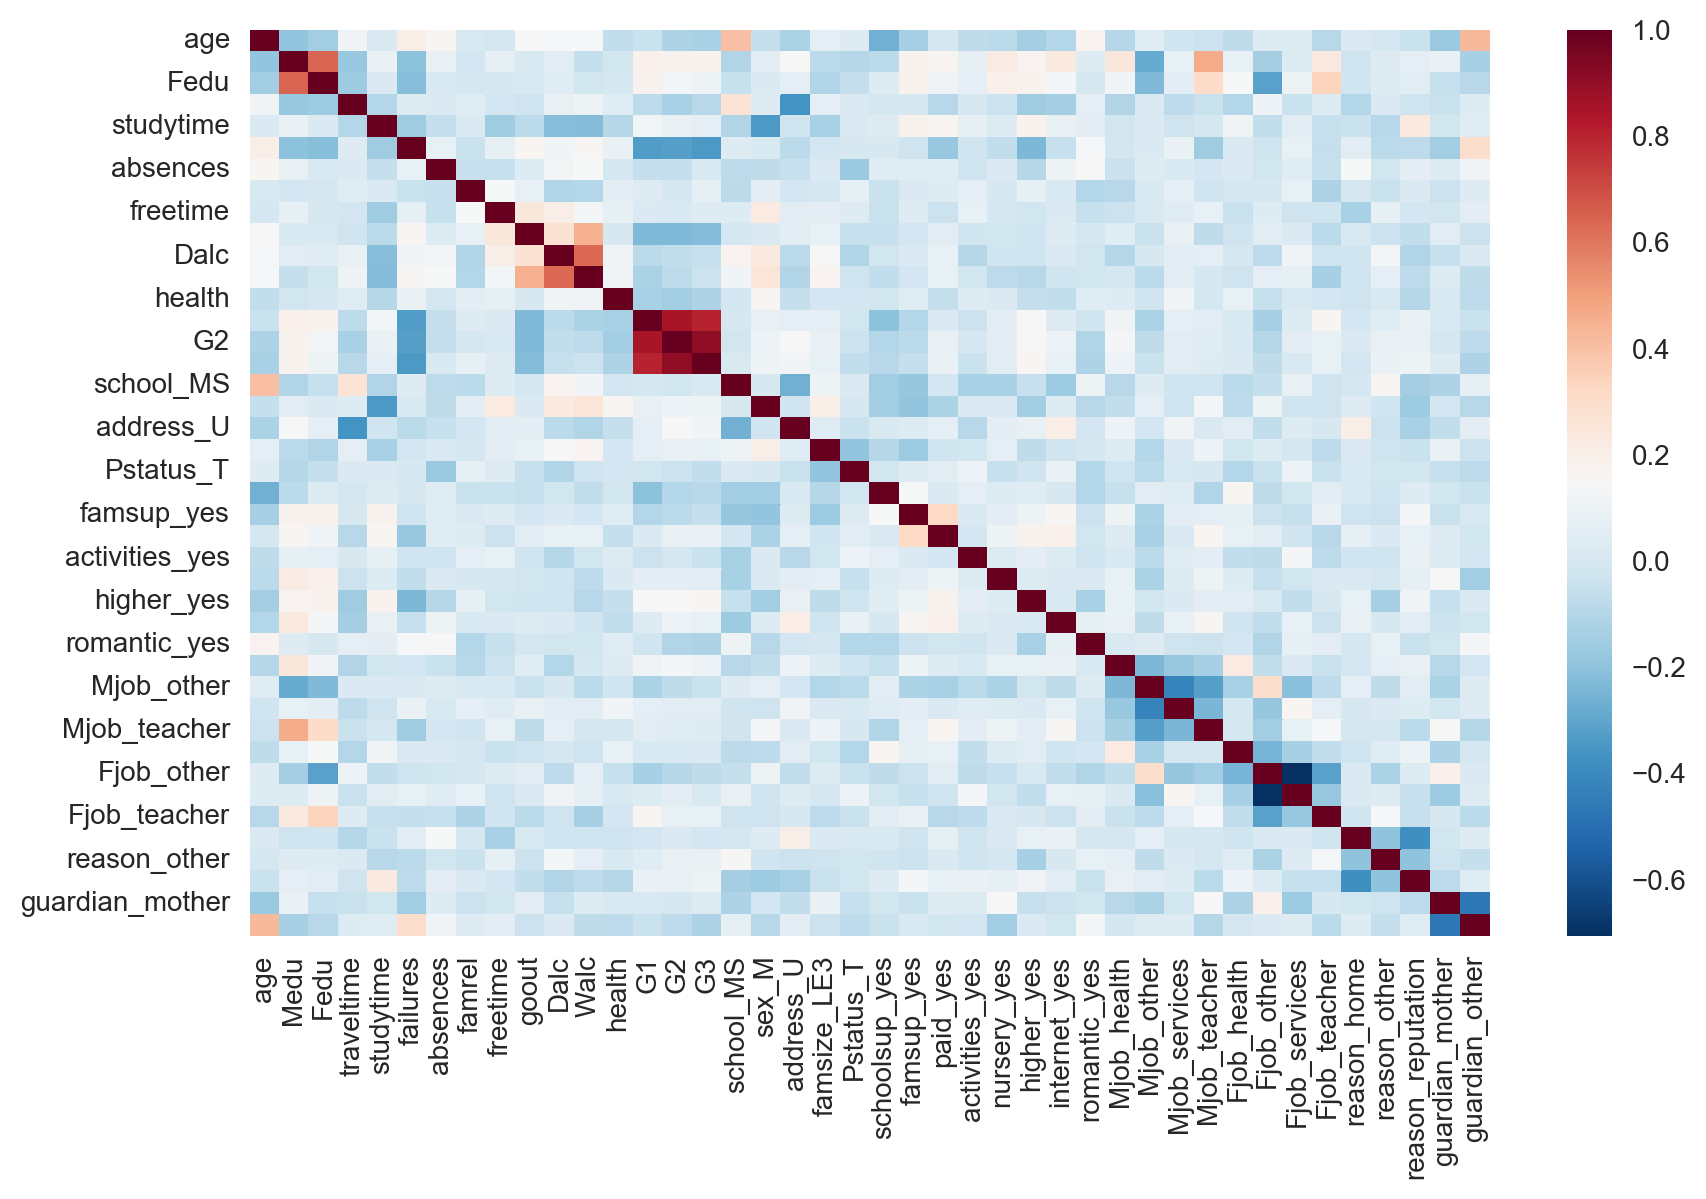

In [25]:
sns.heatmap(df_recodificacion.corr(), cmap = 'RdBu_r')

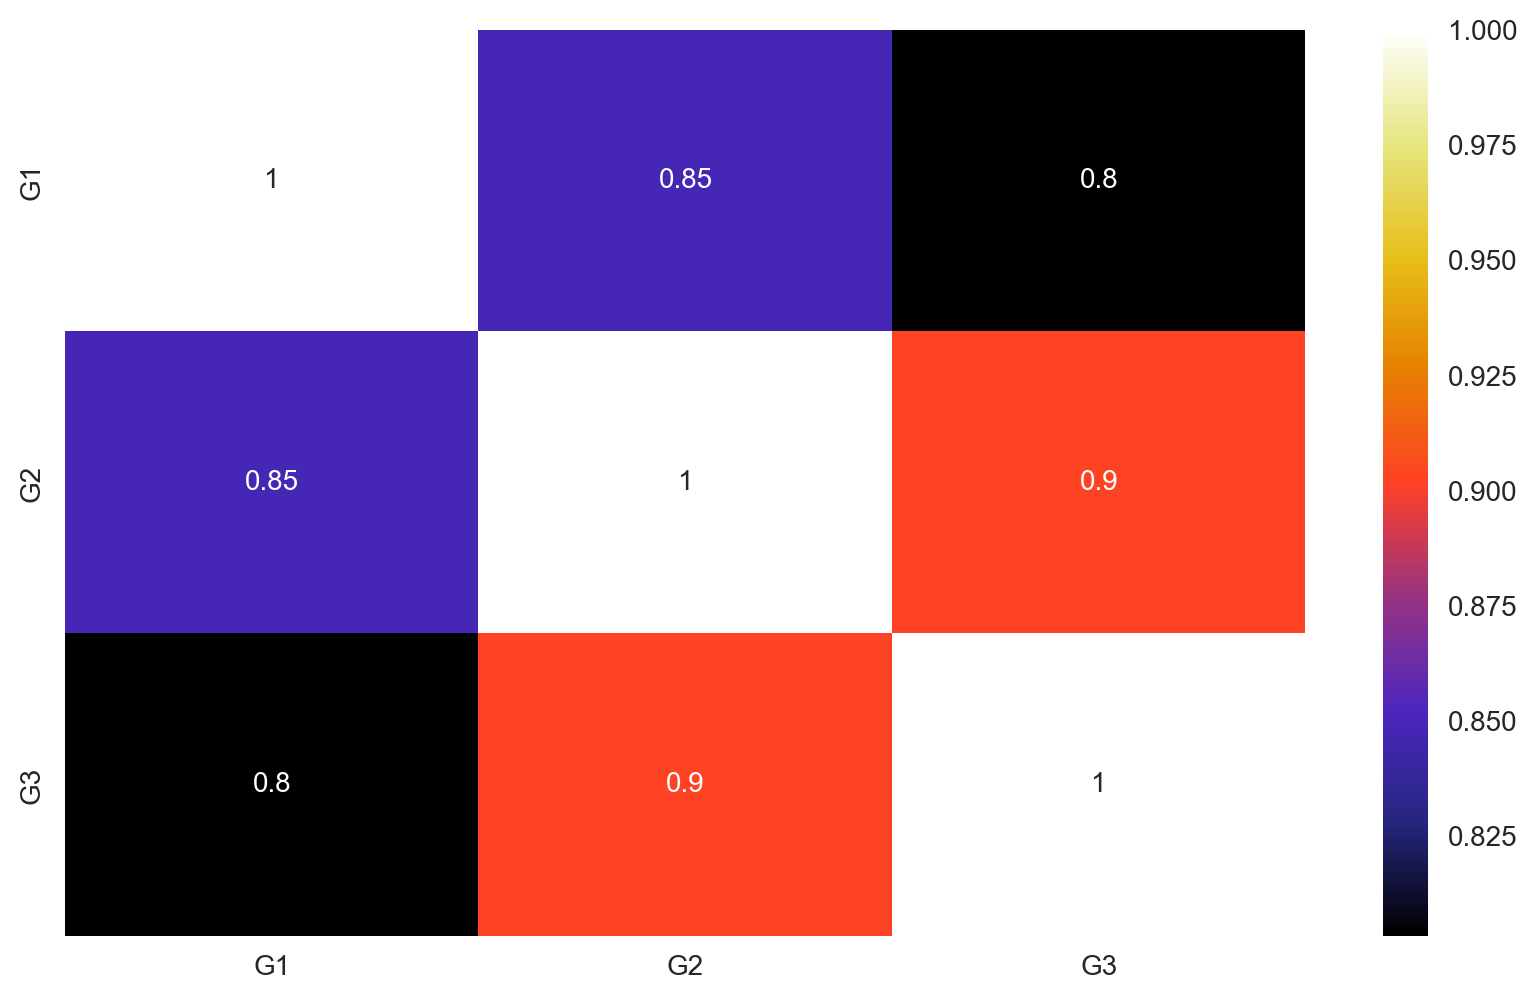

In [122]:
sns.heatmap(df_recodificacion.loc[:, ['G1','G2','G3']].corr(), cmap = 'CMRmap', annot = True)

**Podemos observar múltiples correlaciones como por ejemplo las notas en G1, G2, G3 fuertemente correlacionadas, también que las zonas rurales son inversamente proporcional al tiempo de trayectoría. Ver esto nos sirve para entender a grandes rasgos la situación pero por sobre todo para entender que es mejor hacer un análisis más preciso, por lo que procederé a hacerlo por Failures y los respectivos G**

-----------

In [37]:
df_bin.corr()['failures'].to_frame().assign(absolute = df_bin.corr()['failures'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:20]

failures
G3              -0.345628
G1              -0.328676
G2              -0.322600
guardian_other   0.294434
higher_yes      -0.236934
Fedu            -0.214914
age              0.206134
Medu            -0.205603
paid_yes        -0.176264
goout            0.166014
studytime       -0.158663
Mjob_teacher    -0.156273
Walc             0.155118
guardian_mother -0.146979
romantic_yes     0.135223
Dalc             0.116367
Mjob_services    0.093328
health           0.089626
address_U       -0.084923

* Podemos observar que la relación de la cantidad de clases reprobadas, obviando la directa relación con los G, dejan en evidencia que hay una fuerte correlación con el tutor, cuando éste no es padre directo, muy de cerca con si desea continuar estudias superiores y la educación del padre.
* Esto muestra que es importante los factores externos como el tutor, la educación de los tutores y si es pagado, versus factores más propios como, si el estudiante desea seguir estudios superiores, sale con amigos, tiempo de estudio, consumo de alcohol.

<Figure size 4000x2000 with 0 Axes>

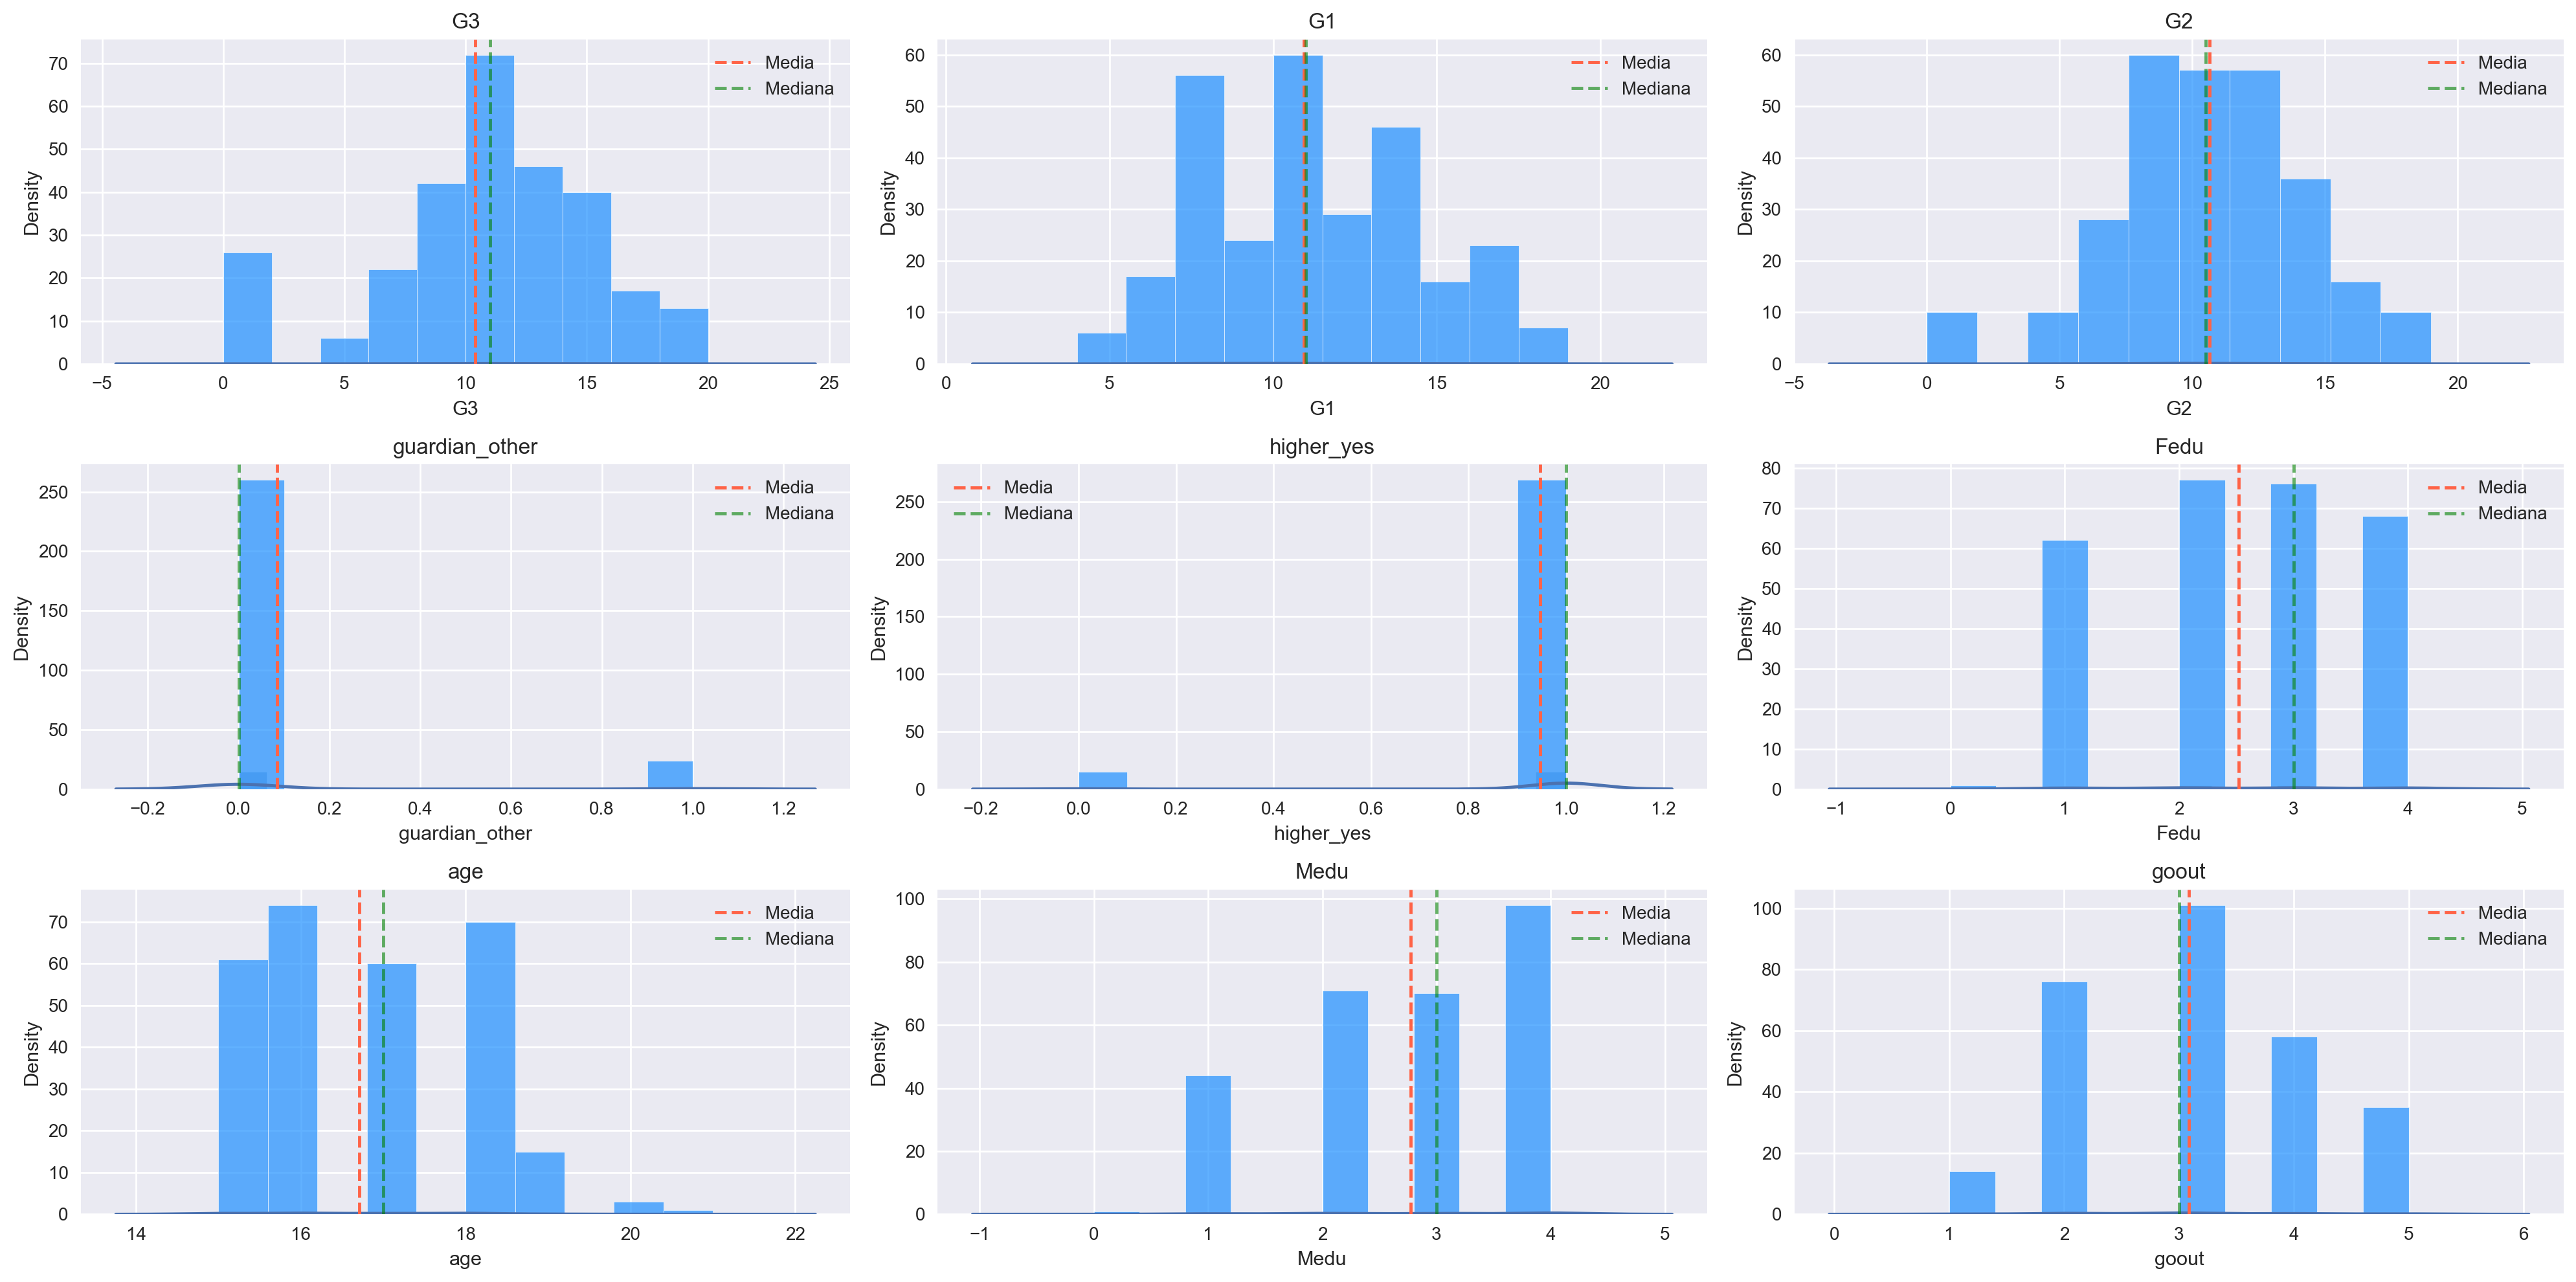

In [88]:
plt.figure(figsize = (20,10))
functions.plot_hist(df_recodificacion, ['G3','G1','G2', 'guardian_other', 'higher_yes','Fedu', 'age','Medu','goout'])
plt.tight_layout()

## Análisis G3

In [83]:
df_bin.corr()['G3'].to_frame().assign(absolute = df_bin.corr()['G3'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:20]

G3
G2                 0.902984
G1                 0.803384
failures          -0.345628
failures_bin      -0.289802
goout             -0.221752
Medu               0.180326
higher_yes         0.162044
age               -0.132134
address_U          0.119397
health            -0.116279
romantic_yes      -0.115377
guardian_other    -0.115167
Fedu               0.106139
reason_reputation  0.105372
sex_M              0.101995
Mjob_health        0.098437
traveltime        -0.091532
schoolsup_yes     -0.090738
paid_yes           0.090671

In [98]:
plt.figure(figsize = (4,3))
functions.grafico_hist(df_recodificacion,'G3','failures_bin')
plt.tight_layout()

In [96]:
plt.figure(figsize = (4,3))
functions.grafico_hist(df_recodificacion,'G3','goout_bin>3')
plt.tight_layout()

In [99]:
plt.figure(figsize = (4,3))
functions.grafico_hist(df_recodificacion,'G3','higher_yes')
plt.tight_layout()

In [100]:
plt.figure(figsize = (4,3))
functions.grafico_hist(df_recodificacion,'G3','guardian_other')
plt.tight_layout()

In [116]:
sns.catplot(data=df_recodificacion,kind='count', x="G3", hue="Medu>2",height=3)

* Los alumnos que no tienen interés por ir a la educación superior, tienen una diferencia de 4 puntos en G3, que si parece ser substancial.
* Podemos observar que la cantidad de materias reprobadas mayor a 0, está sujeta de manera substancial al grupo peor clasificado de G3, tienen una diferencia de 3 puntos en G3
* Podemos observar que los alumnos que salen mucho con sus amigos(puntajes de 4 y 5) tienen una diferencia de 3 puntos con respecto a los que no lo hacen, que no es tan substancial como los que desean ir a la educación superior pero si es significativo a la hora de medir los peores puntajes, marcando una tendencia más clara incluso que failures.
* Es impresionante contemplar que, la educación de la madre en el cuartil superior de G3 tiene una proporción tan importante.

### Analisis G1

In [38]:
df_bin.corr()['G1'].to_frame().assign(absolute = df_bin.corr()['G1'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:20]

G1
G2                 0.848606
G3                 0.803384
failures          -0.328676
goout             -0.226923
schoolsup_yes     -0.206195
Medu               0.189984
Fedu               0.181079
Fjob_teacher       0.165586
higher_yes         0.153411
Fjob_other        -0.139045
health            -0.128751
studytime          0.126020
Walc              -0.122382
Mjob_other        -0.120695
Mjob_health        0.110589
famsup_yes        -0.104258
reason_reputation  0.092036
sex_M              0.081908
Dalc              -0.080415

In [72]:
def grafico_hist(df,var,binarize):
    plt.figure(figsize = (20,10))
    g = sns.histplot(data=df,x=var, hue=binarize,bins=30)
    ax = plt.gca()
    ax.axvline(df[df[binarize]==1][var].mean(),color='green',lw=3,ls='--')
    ax.text(df[df[binarize]==1][var].mean()/df[df[binarize]==1][var].count()/2, 0.7, f"mean_{var}={df[df[binarize]==1][var].mean():.0f} ",transform=ax.transAxes,color='green',fontweight='bold',fontsize=20)

    ax.axvline(df[df[binarize]==0][var].mean(),color='blue',lw=3,ls='--')
    ax.text(df[df[binarize]==0][var].mean()/df[df[binarize]==0][var].count()/2, 0.8, f"mean_{var}={df[df[binarize]==0][var].mean():.0f} ",transform=ax.transAxes,color='blue',fontweight='bold',fontsize=20)

<Figure size 4000x2000 with 0 Axes>

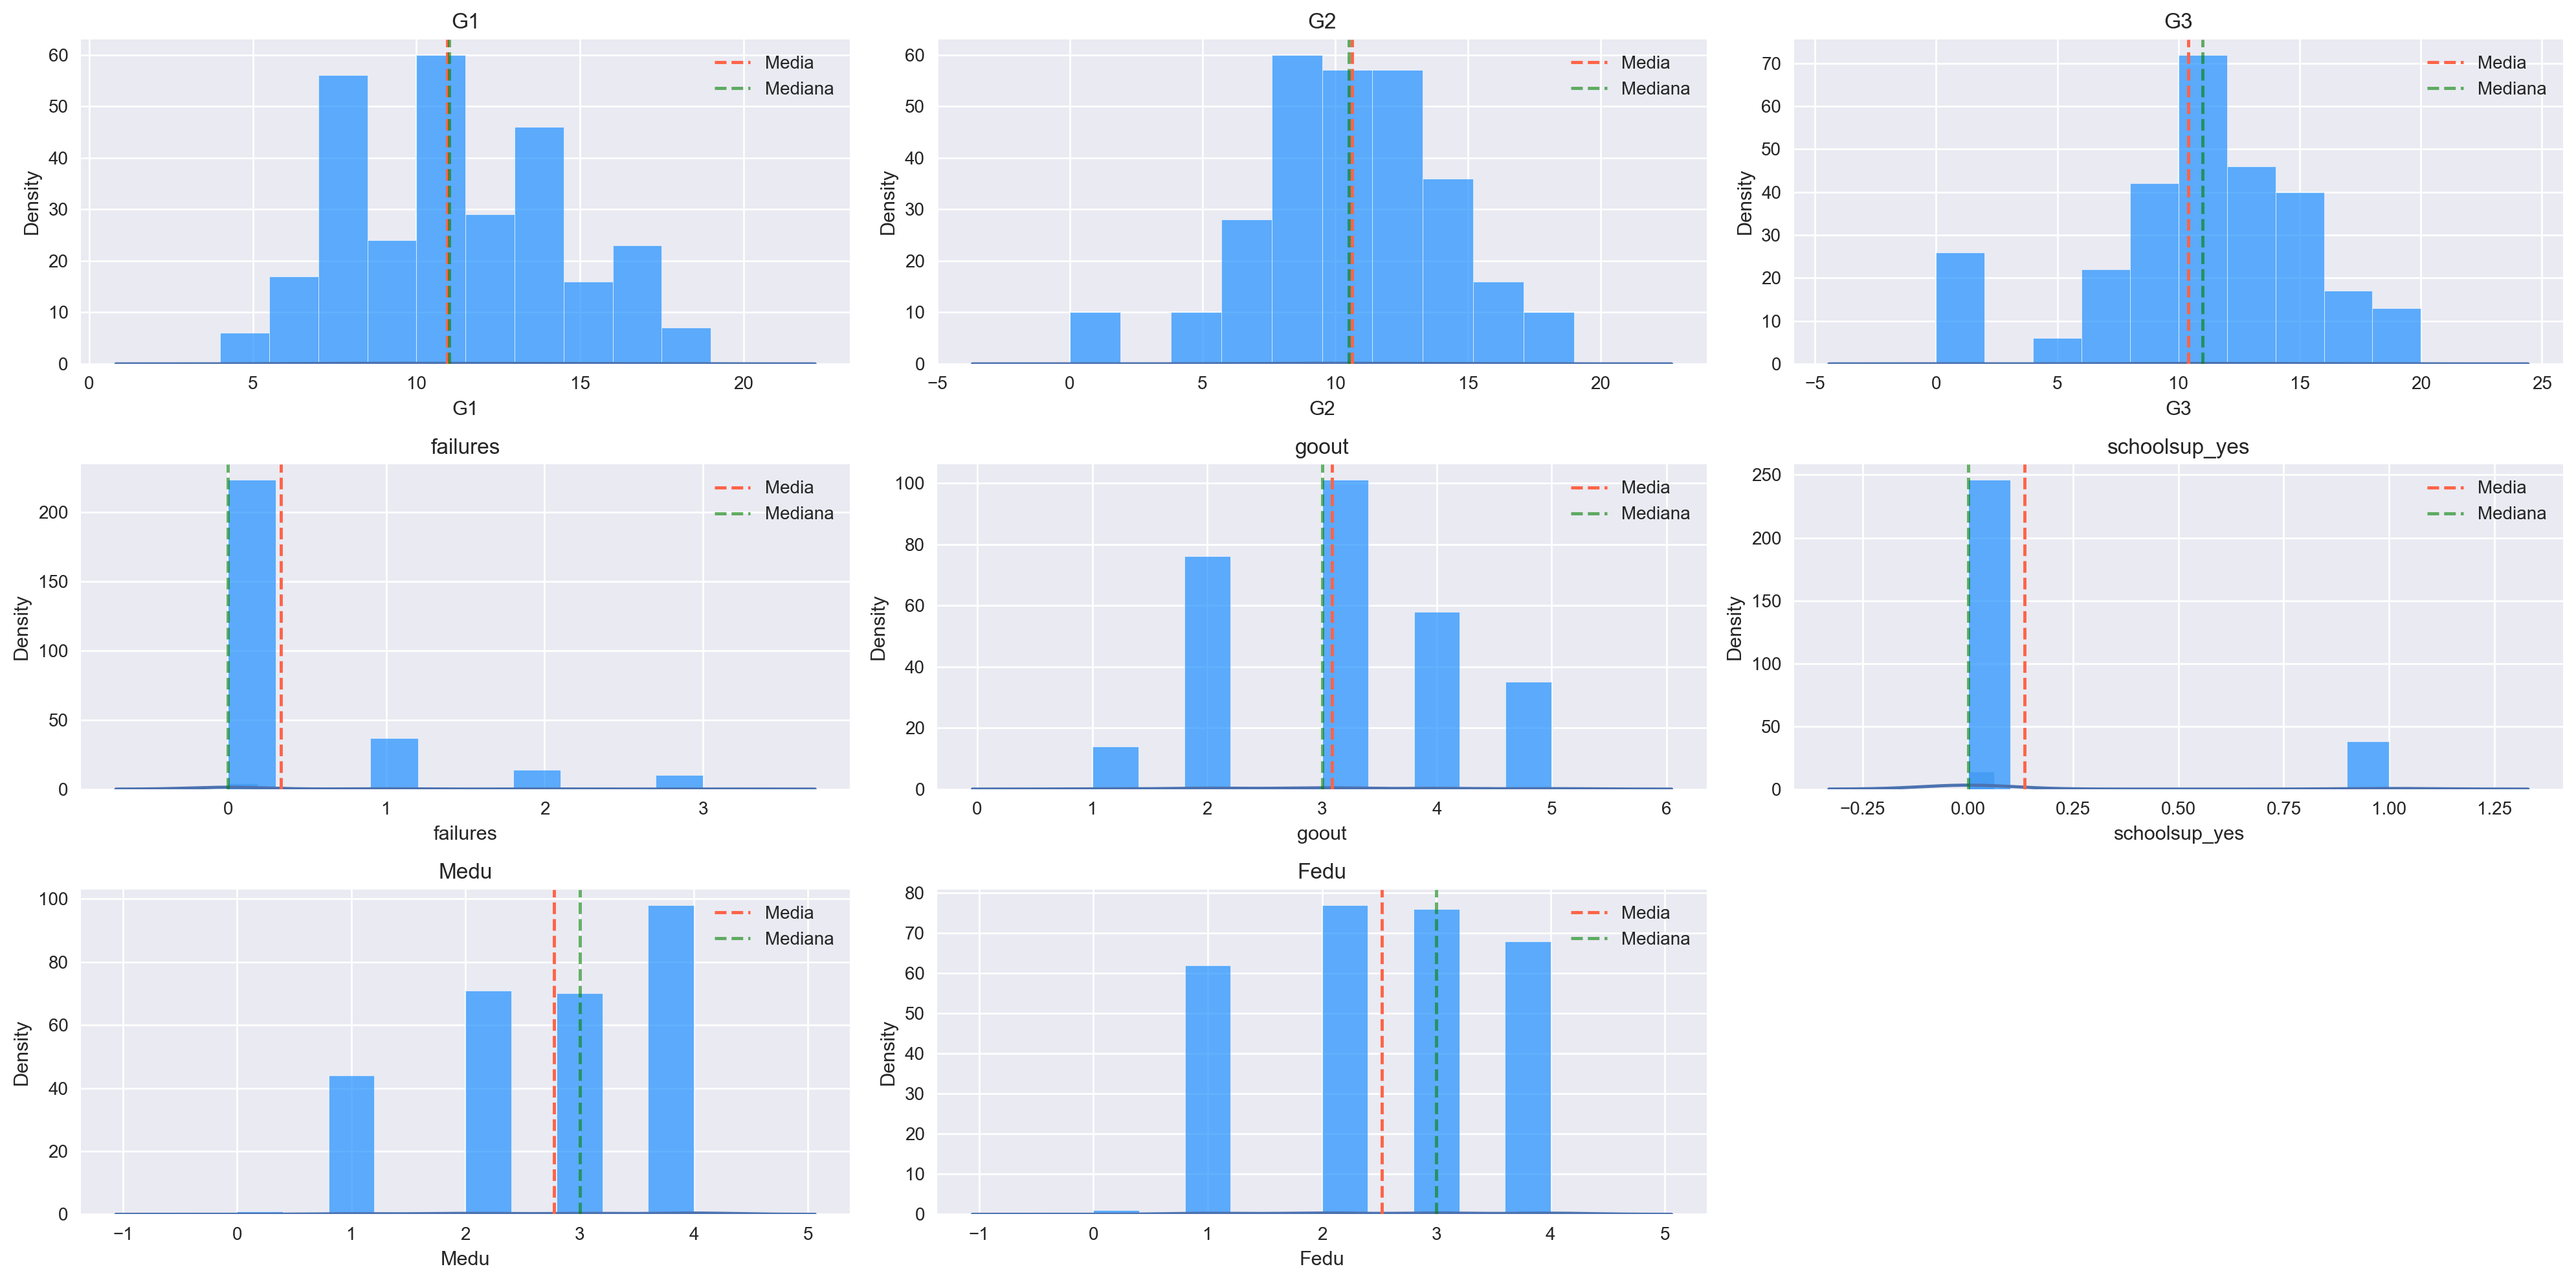

In [13]:
plt.figure(figsize = (20,10))
functions.plot_hist(df_recodificacion, ['G1','G2','G3', 'failures', 'goout', 'schoolsup_yes','Medu', 'Fedu'])
plt.tight_layout()

* Podemos observar en G1, G2 y G3 que a medida que pasa el tiempo, los alumnos con mala calificación se acrecentan criticamente

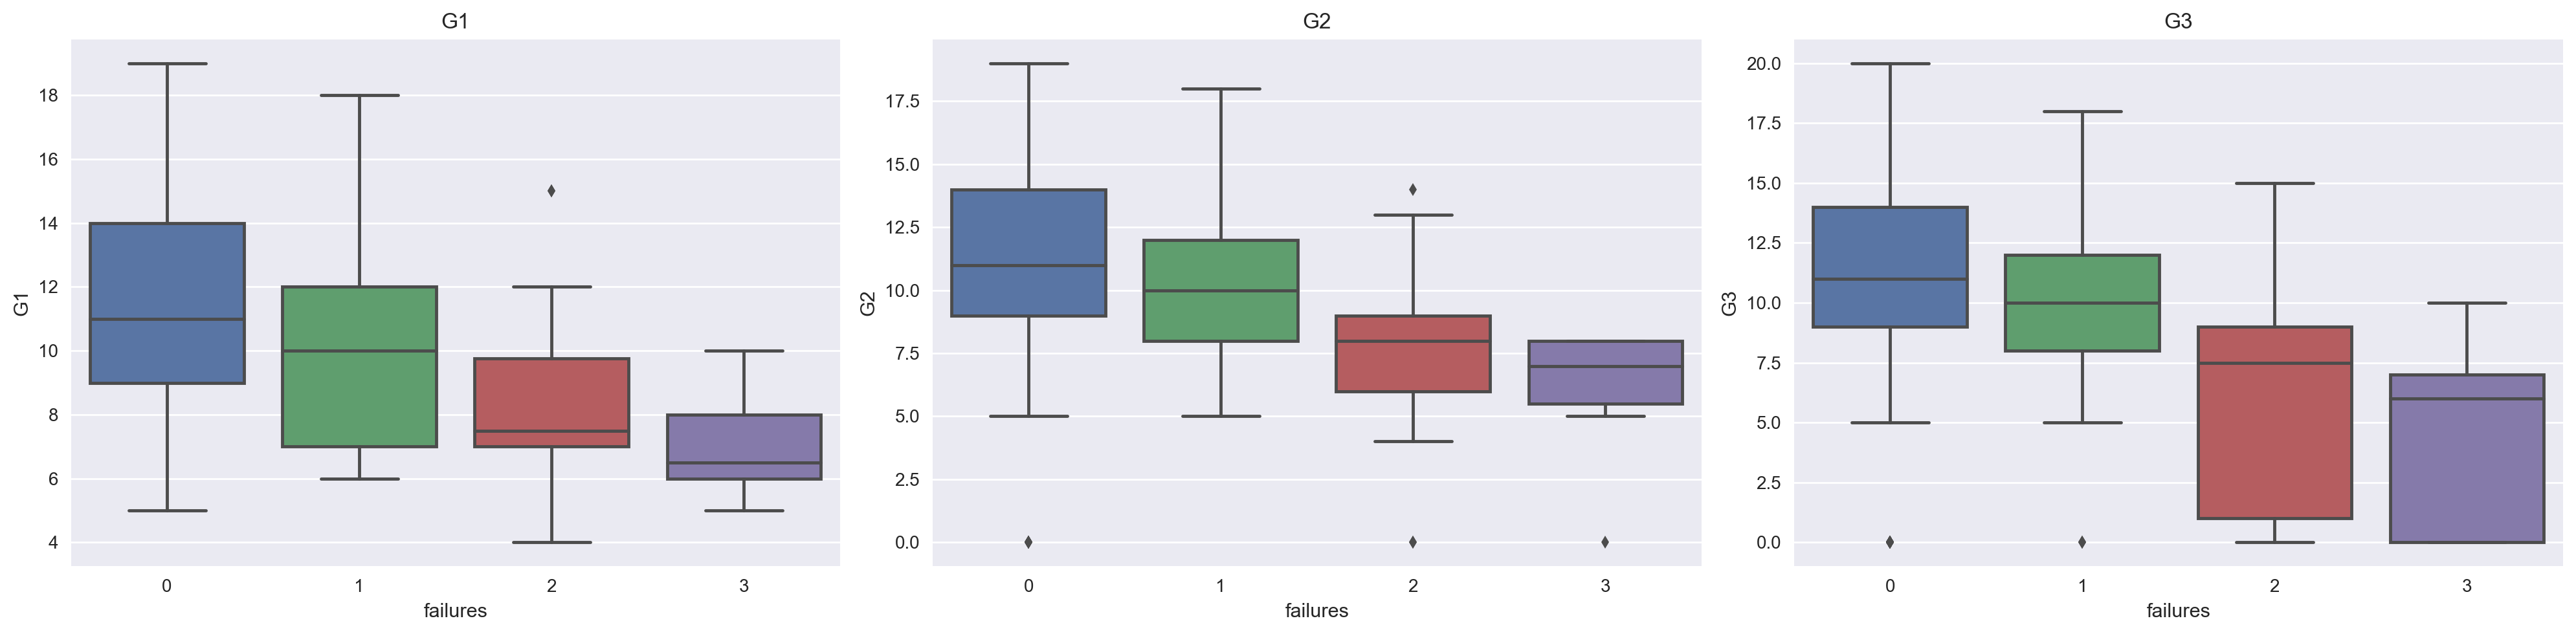

In [19]:
plt.figure(figsize = (20,5))
for index, column in enumerate(['G1', 'G2', 'G3']):
    
    plt.subplot(1,3,index+1)
    plt.title(column)
    sns.boxplot('failures',column, data = df_recodificacion)
    
    
plt.tight_layout()

* Podemos observar que a medida que avanza el año, en G3 los failures llegan a niveles críticos

* Podemos observar una fuerte correlación entre las notas de (G1, G2) y (G2 y G3)